In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
y_axis = {
    'auc':{
        'lim':[-0.3, 0.1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.4, 0.1],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.1],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}
tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}
algos = {
    'erm':'ERM (Baseline)',
    'irm':'IRM',
    'dro':'GroupDRO',
    'coral':'CORAL', 
    'adversarial':'AL',
}
metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration'
}

#### ID Performance (Actual)

In [3]:
df = get_result_table(
    train_year='2009_2010_2011_2012',
    tasks=tasks,
    algos=algos,
    metrics=metrics
)
print('ID performance of 09-12 Models')
display(df)

ID performance of 09-12 Models


Algorithm                                 ERM (Baseline)  \
Metric      Task                                           
AUROC       Admission to ICU        0.841 (0.822, 0.857)   
            In-Hospital Mortality    0.819 (0.79, 0.844)   
            LOS > 7 Days             0.753 (0.74, 0.765)   
            Readmission in 30 Days  0.768 (0.748, 0.788)   
AUPRC       Admission to ICU        0.379 (0.333, 0.426)   
            In-Hospital Mortality   0.096 (0.074, 0.123)   
            LOS > 7 Days             0.45 (0.424, 0.473)   
            Readmission in 30 Days  0.258 (0.223, 0.299)   
Calibration Admission to ICU         0.005 (0.002, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.008 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                            IRM  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.821, 0.855)   
            In-Hospital Mortality   0.819 (0.793, 0.841)   
            LOS > 7 Days            0.751 (0.739, 0.763)   
            Readmission in 30 Days  0.766 (0.744, 0.785)   
AUPRC       Admission to ICU        0.375 (0.327, 0.424)   
            In-Hospital Mortality   0.097 (0.075, 0.126)   
            LOS > 7 Days            0.449 (0.424, 0.472)   
            Readmission in 30 Days  0.254 (0.216, 0.291)   
Calibration Admission to ICU         0.006 (0.002, 0.01)   
            In-Hospital Mortality   0.009 (0.006, 0.011)   
            LOS > 7 Days            0.011 (0.005, 0.018)   
            Readmission in 30 Days  0.004 (0.003, 0.007)   

Algorithm                                       GroupDRO  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.823, 0.858)   
            In-Hospital Mortality   0.821 (0.794, 0.844)   
            LOS > 7 Days            0.753 (0.739, 0.766)   
            Readmission in 30 Days  0.769 (0.747, 0.789)   
AUPRC       Admission to ICU        0.377 (0.327, 0.426)   
            In-Hospital Mortality   0.097 (0.077, 0.124)   
            LOS > 7 Days            0.449 (0.424, 0.474)   
            Readmission in 30 Days  0.258 (0.221, 0.295)   
Calibration Admission to ICU        0.005 (0.002, 0.009)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.009 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                          CORAL                    AL  
Metric      Task                                                                
AUROC       Admission to ICU        0.838 (0.819, 0.855)  0.842 (0.823, 0.859)  
            In-Hospital Mortality   0.823 (0.796, 0.848)  0.822 (0.795, 0.847)  
            LOS > 7 Days             0.753 (0.74, 0.765)  0.753 (0.741, 0.765)  
            Readmission in 30 Days  0.767 (0.746, 0.789)  0.769 (0.747, 0.791)  
AUPRC       Admission to ICU        0.389 (0.342, 0.439)  0.381 (0.332, 0.424)  
            In-Hospital Mortality     0.1 (0.079, 0.126)  0.097 (0.076, 0.122)  
            LOS > 7 Days             0.45 (0.424, 0.473)  0.451 (0.426, 0.476)  
            Readmission in 30 Days  0.258 (0.223, 0.294)  0.259 (0.226, 0.297)  
Calibration Admission to ICU        0.005 (0.002, 0.009)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.004 (0.002, 0.006)  0.005 (0.002, 0.007)  
            LOS > 7 Days            0.008 (0.003, 0.015)   0.01 (0.004, 0.017)  
            Readmission in 30 Days  0.007 (0.004, 0.012)  0.007 (0.003, 0.012)

#### ID Performance of DG Algorithms Relative to ERM

In [4]:
df = get_result_table(
    train_year='2009_2010_2011_2012',
    tasks=tasks,
    algos=algos,
    metrics=metrics,
    use_comparator='delta',
)
print('ID performance of 09-12 Models')
display(df)

ID performance of 09-12 Models


Algorithm                                 ERM (Baseline)  \
Metric      Task                                           
AUROC       Admission to ICU        0.841 (0.822, 0.857)   
            In-Hospital Mortality    0.819 (0.79, 0.844)   
            LOS > 7 Days             0.753 (0.74, 0.765)   
            Readmission in 30 Days  0.768 (0.748, 0.788)   
AUPRC       Admission to ICU        0.379 (0.333, 0.426)   
            In-Hospital Mortality   0.096 (0.074, 0.123)   
            LOS > 7 Days             0.45 (0.424, 0.473)   
            Readmission in 30 Days  0.258 (0.223, 0.299)   
Calibration Admission to ICU         0.005 (0.002, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.008 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                               IRM  \
Metric      Task                                              
AUROC       Admission to ICU           -0.001 (-0.001, 0.0)   
            In-Hospital Mortality    -0.001 (-0.004, 0.003)   
            LOS > 7 Days              -0.001 (-0.002, -0.0)   
            Readmission in 30 Days   -0.002 (-0.006, 0.003)   
AUPRC       Admission to ICU        -0.004 (-0.006, -0.001)   
            In-Hospital Mortality     0.001 (-0.004, 0.007)   
            LOS > 7 Days             -0.001 (-0.003, 0.001)   
            Readmission in 30 Days   -0.004 (-0.011, 0.003)   
Calibration Admission to ICU            0.0 (-0.001, 0.001)   
            In-Hospital Mortality      0.003 (0.002, 0.004)   
            LOS > 7 Days                 0.003 (0.0, 0.003)   
            Readmission in 30 Days   -0.003 (-0.005, 0.001)   

Algorithm                                         GroupDRO  \
Metric      Task                                             
AUROC       Admission to ICU               0.0 (-0.0, 0.0)   
            In-Hospital Mortality    0.003 (-0.001, 0.006)   
            LOS > 7 Days                  -0.0 (-0.0, 0.0)   
            Readmission in 30 Days   0.001 (-0.002, 0.004)   
AUPRC       Admission to ICU              -0.0 (-0.0, 0.0)   
            In-Hospital Mortality    0.002 (-0.004, 0.008)   
            LOS > 7 Days                 -0.0 (-0.0, -0.0)   
            Readmission in 30 Days  -0.001 (-0.006, 0.005)   
Calibration Admission to ICU              -0.0 (-0.0, 0.0)   
            In-Hospital Mortality     -0.0 (-0.001, 0.001)   
            LOS > 7 Days                   0.0 (-0.0, 0.0)   
            Readmission in 30 Days      -0.0 (-0.001, 0.0)   

Algorithm                                            CORAL  \
Metric      Task                                             
AUROC       Admission to ICU        -0.003 (-0.009, 0.004)   
            In-Hospital Mortality    0.004 (-0.001, 0.009)   
            LOS > 7 Days                   0.0 (-0.0, 0.0)   
            Readmission in 30 Days  -0.001 (-0.005, 0.003)   
AUPRC       Admission to ICU         0.011 (-0.004, 0.025)   
            In-Hospital Mortality     0.003 (-0.004, 0.01)   
            LOS > 7 Days                  -0.0 (-0.0, 0.0)   
            Readmission in 30 Days    -0.0 (-0.007, 0.006)   
Calibration Admission to ICU          -0.0 (-0.002, 0.002)   
            In-Hospital Mortality    -0.002 (-0.002, -0.0)   
            LOS > 7 Days                    0.0 (0.0, 0.0)   
            Readmission in 30 Days     0.0 (-0.002, 0.004)   

Algorithm                                               AL  
Metric      Task                                            
AUROC       Admission to ICU         0.001 (-0.002, 0.004)  
            In-Hospital Mortality    0.003 (-0.002, 0.009)  
            LOS > 7 Days               0.0 (-0.001, 0.001)  
            Readmission in 30 Days   0.001 (-0.002, 0.004)  
AUPRC       Admission to ICU         0.001 (-0.007, 0.008)  
            In-Hospital Mortality    0.001 (-0.005, 0.008)  
            LOS > 7 Days             0.001 (-0.001

#### OOD Performance Relative to ERM(09-12)

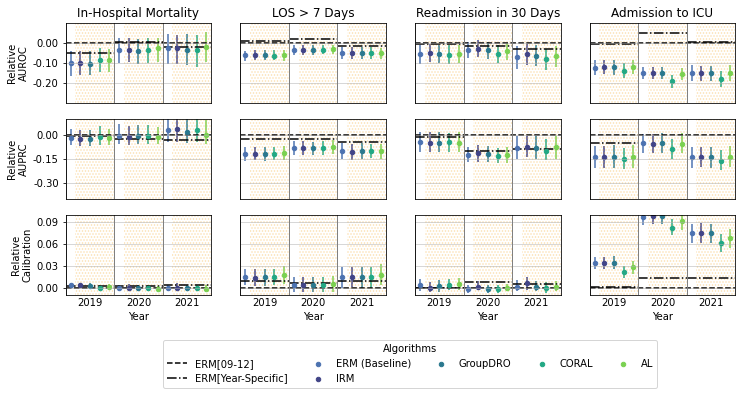

In [4]:
plot_rel_ood_perf(
    train_year='2009_2010_2011_2012',
    tasks=tasks,
    metrics=metrics,
    algos=algos,
    y_axis=y_axis,
)